In [ ]:
# z = w ^ t * x + b
# a = 1 / 1 - e ^ (-z)
# Error = 1 * (y - y^)^2 / 2

In [92]:
!gdown 1v0AYsgtPZIblK_nXfG3TJ9eph3_jrjz4

Downloading...
From (original): https://drive.google.com/uc?id=1v0AYsgtPZIblK_nXfG3TJ9eph3_jrjz4
From (redirected): https://drive.google.com/uc?id=1v0AYsgtPZIblK_nXfG3TJ9eph3_jrjz4&confirm=t&uuid=dbc928d0-65e4-4fc9-89b4-7b67fd2e0311
To: /content/Devnagari.zip
100% 16.6M/16.6M [00:00<00:00, 34.0MB/s]


In [93]:
!unzip /content/drive/MyDrive/Devnagari.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

# Task 1: Data Preparation

In [94]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

img_height, img_width = 28, 28

def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)

      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_height, img_width)) # Resize
      img = np.array(img) / 255.0 #Normalize pixel value
      images.append(img)
      labels.append(label)

  return np.array(images), np.array(labels)

In [95]:
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

In [96]:
# Reshaping for FCN
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

In [97]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [98]:
print(f'Training set: {x_train.shape}, Labels: {y_train.shape}')
print(f'Test set: {x_test.shape}, Labels: {y_test.shape}')

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Test set: (3000, 28, 28, 1), Labels: (3000, 10)


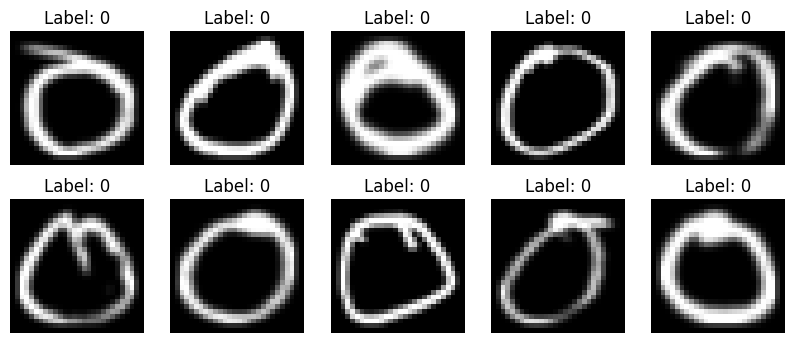

In [99]:
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f'Label: {np.argmax(y_train[i])}')
  plt.axis('off')
plt.show()

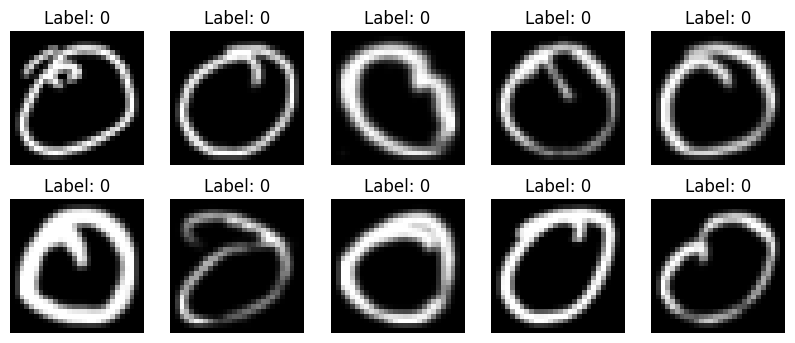

In [100]:
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title(f'Label: {np.argmax(y_train[i])}')
  plt.axis('off')
plt.show()

# Task 2: Build FCN model

In [101]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (img_height, img_width, 1)

model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation="sigmoid"),
        layers.Dense(128, activation="sigmoid"),
        layers.Dense(256, activation="sigmoid"),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [102]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile Model

In [105]:
model.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

# Task 4: Train the Model

In [109]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

history = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2,
    callbacks = callbacks,
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9675 - loss: 0.1156 - val_accuracy: 0.0000e+00 - val_loss: 9.3344
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9736 - loss: 0.0961 - val_accuracy: 0.0000e+00 - val_loss: 9.7086
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9770 - loss: 0.0793 - val_accuracy: 0.0000e+00 - val_loss: 9.7735
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9830 - loss: 0.0659 - val_accuracy: 0.0000e+00 - val_loss: 10.0069
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9852 - loss: 0.0556 - val_accuracy: 0.0000e+00 - val_loss: 10.0329


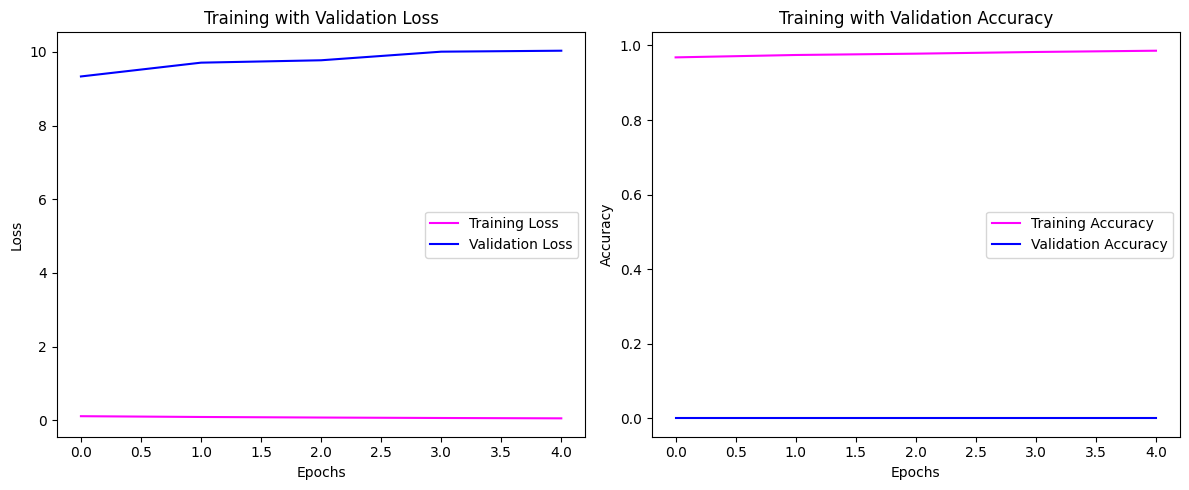

In [110]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='magenta')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training with Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy', color='magenta')
plt.plot(val_acc, label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training with Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [111]:
print(train_loss)
print(val_loss)
print(train_acc)
print(val_acc)

[0.11303400993347168, 0.091732457280159, 0.07667922228574753, 0.06434977799654007, 0.05487149953842163]
[9.334389686584473, 9.708608627319336, 9.7734956741333, 10.006853103637695, 10.032929420471191]
[0.9680882096290588, 0.9744852781295776, 0.9780147075653076, 0.9825735092163086, 0.9859558939933777]
[0.0, 0.0, 0.0, 0.0, 0.0]


# Task 5: Evaluate The Model

In [112]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

94/94 - 0s - 3ms/step - accuracy: 0.7770 - loss: 2.0889
Test accuracy: 0.7770
Test loss: 2.0889


# Task 6: Save and Load the Model

In [113]:
model.save('devanagari_fcn_model.h5')
print("Model saved successfully!")

loadded_model = keras.models.load_model('devanagari_fcn_model.h5')
print("Model loaded successfully")

loaded_loss, loaded_acc = loadded_model.evaluate(x_test, y_test, verbose=2)
print(f'Loaded model accuracy: {loaded_acc:.4f}')
print(f'Loaded model loss: {loaded_loss:.4f}')

Model saved successfully!
Model loaded successfully
94/94 - 1s - 6ms/step - accuracy: 0.7770 - loss: 2.0889
Loaded model accuracy: 0.7770
Loaded model loss: 2.0889


# Task 7: Predictions

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted labels for first image: 0
True label for first image: 0


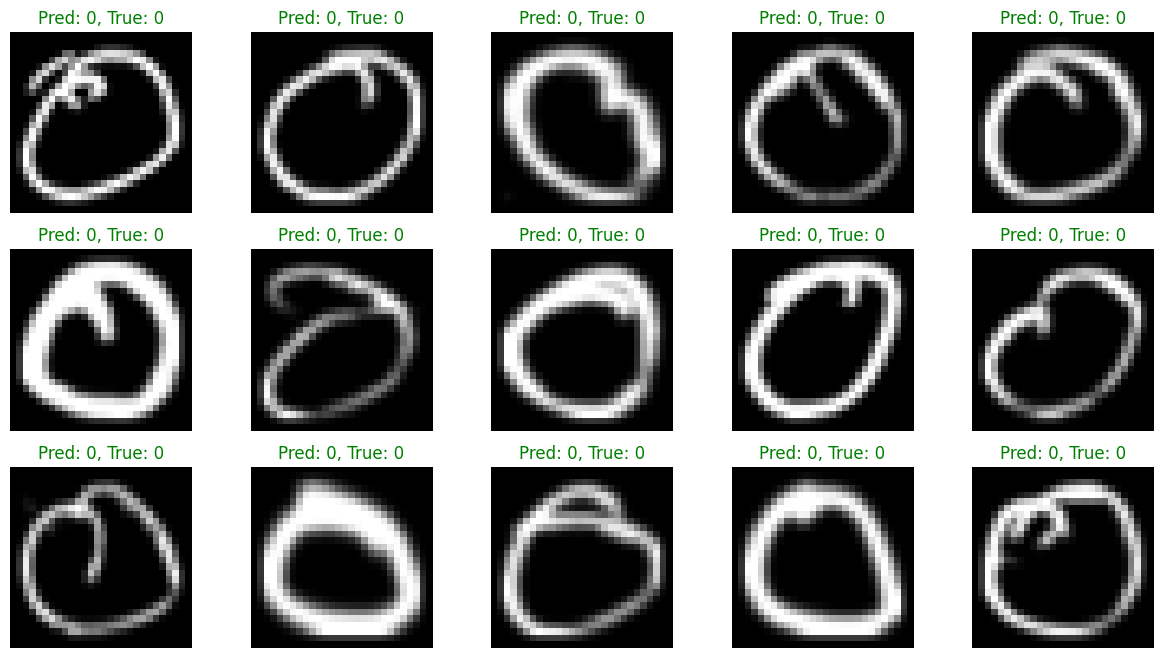

In [114]:
predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print(f'Predicted labels for first image: {predicted_labels[0]}')
print(f'True label for first image: {true_labels[0]}')

plt.figure(figsize=(15, 8))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  predicted = predicted_labels[i]
  actual = true_labels[i]
  color = 'green' if predicted == actual else 'red'
  plt.title(f'Pred: {predicted}, True: {actual}', color = color)
  plt.axis('off')
plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       300
           1       0.75      0.99      0.85       300
           2       0.76      0.94      0.84       300
           3       0.93      0.96      0.95       300
           4       0.61      0.98      0.75       300
           5       0.92      0.98      0.95       300
           6       0.79      0.97      0.87       300
           7       0.94      0.97      0.96       300
           8       0.00      0.00      0.00       300
           9       0.00      0.00      0.00       300

    accuracy                           0.78      3000
   macro avg       0.64      0.78      0.70      3000
weighted avg       0.64      0.78      0.70      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


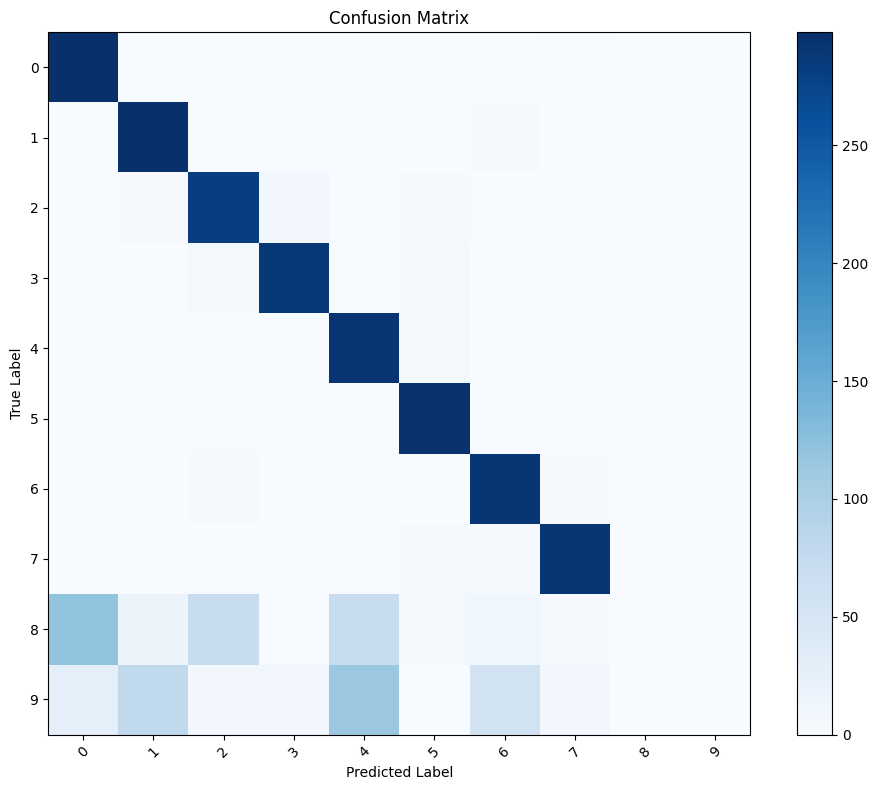

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report")
print(classification_report(true_labels, predicted_labels))

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()